In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [79]:
train = pd.read_csv("housing.csv")

In [80]:
train.shape

(20640, 10)

In [81]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


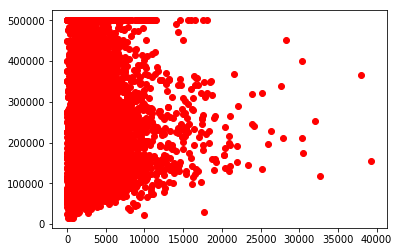

In [82]:
plt.scatter(x=train['total_rooms'], y=train['median_house_value'], color = 'red')

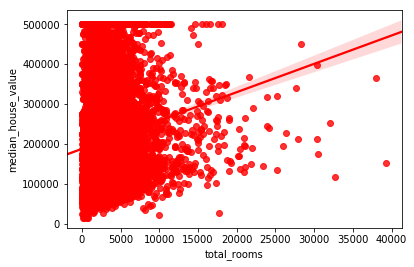

In [83]:
sns.regplot(x=train['total_rooms'], y=train['median_house_value'], fit_reg=True, color = 'red')

In [84]:
train = train.drop(train[(train['total_rooms']>25000) & (train['median_house_value']<400000)].index)

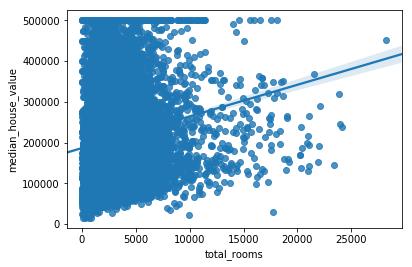

In [85]:
sns.regplot(x=train['total_rooms'], y=train['median_house_value'], fit_reg=True)
plt.show()

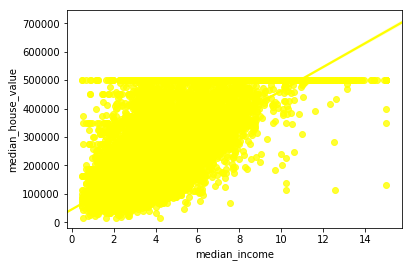

In [86]:
sns.regplot(x=train['median_income'], y=train['median_house_value'], fit_reg=True, color = 'yellow')

In [87]:
train = train.drop(train[(train['median_income']>10) ].index)

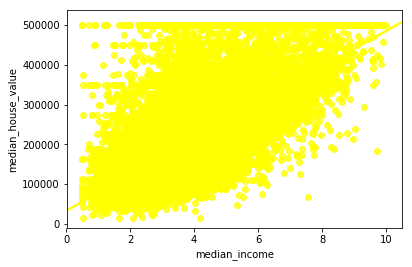

In [88]:
sns.regplot(x=train['median_income'], y=train['median_house_value'], fit_reg=True, color = 'yellow')

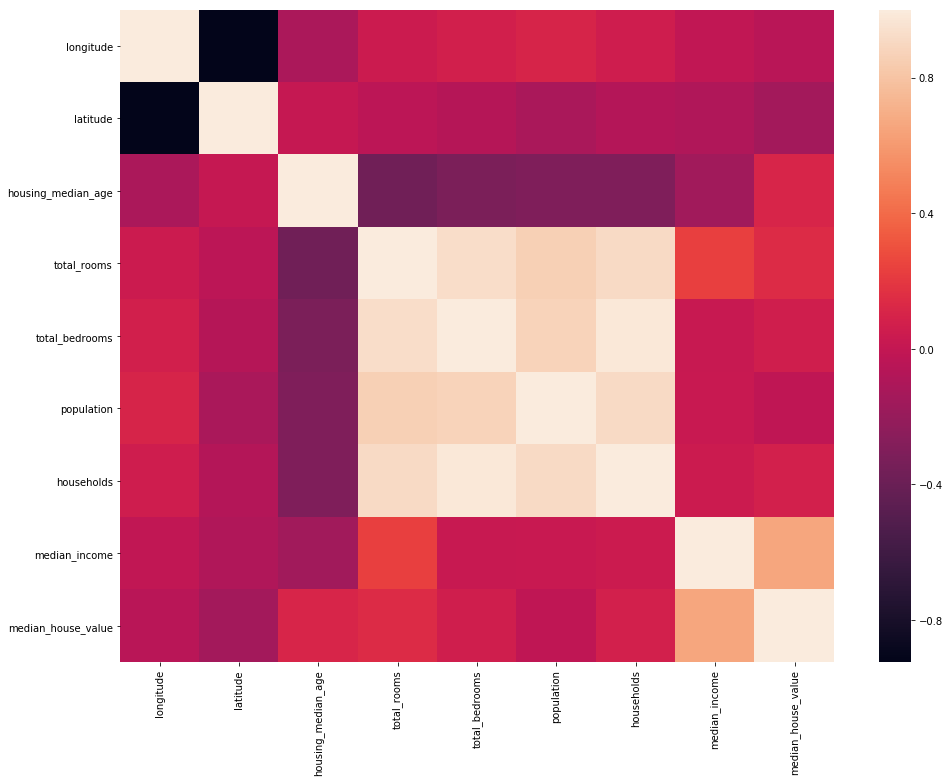

In [89]:
corr = train.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=False)

In [90]:
print("Most important features relative to median_house_value ")
corr = train.corr()
corr.sort_values(["median_house_value"], ascending = False, inplace = True)
print(corr.median_house_value)

Most important features relative to median_house_value 
median_house_value    1.000000
median_income         0.661460
total_rooms           0.138938
housing_median_age    0.109472
households            0.082920
total_bedrooms        0.066082
population           -0.016641
longitude            -0.046312
latitude             -0.145816
Name: median_house_value, dtype: float64


In [91]:
train_nas = train.isnull().sum()
train_nas = train_nas[train_nas>0]
train_nas.sort_values(ascending=False)

total_bedrooms    204
dtype: int64

In [92]:
numerical_features = train.select_dtypes(exclude = ["object"]).columns
print(numerical_features)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [93]:
categorical_features = train.select_dtypes(include=['object']).columns
categorical_features

Index(['ocean_proximity'], dtype='object')

In [94]:
train_num = train[numerical_features]
train_cat = train[categorical_features]

In [95]:
train_num.shape,train_cat.shape

((20319, 9), (20319, 1))

In [96]:
train_cat = pd.get_dummies(train_cat, drop_first=True)
train_cat.shape

(20319, 4)

In [97]:
train_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        204
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [98]:
train_num.mean()

longitude               -119.568026
latitude                  35.636795
housing_median_age        28.640632
total_rooms             2613.123530
total_bedrooms           537.380462
population              1421.601604
households               499.063832
median_income              3.748733
median_house_value    202661.164526
dtype: float64

In [99]:
train_num = train_num.fillna(train_num.mean())

In [100]:
train_cat.head()

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [101]:
train = pd.concat([train_cat,train_num],axis=1)
x = train.drop(['median_house_value'], axis=1)
y = train['median_house_value']
train.shape

(20319, 13)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.3,random_state=0)

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lin = LinearRegression(normalize=True)

In [106]:
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [107]:
pred_lin = lin.predict(x_test)

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
mse = np.sqrt(mean_squared_error(pred_lin,y_test))
print(mse)

1.5599876455251515e-10
